<a href="https://colab.research.google.com/github/AnirudhJM24/myML/blob/main/petalswithcrossval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
%matplotlib inline
from matplotlib import pyplot as plt
iris=load_iris()

([], <a list of 0 Text major ticklabel objects>)

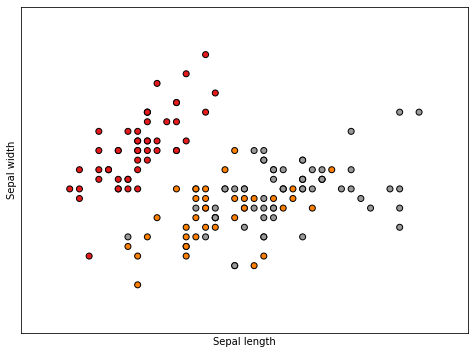

In [2]:
X = iris.data[:, :2] #sepal
z = iris.data[:,2:4] #petal
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Following plot for petal,above sepal

([], <a list of 0 Text major ticklabel objects>)

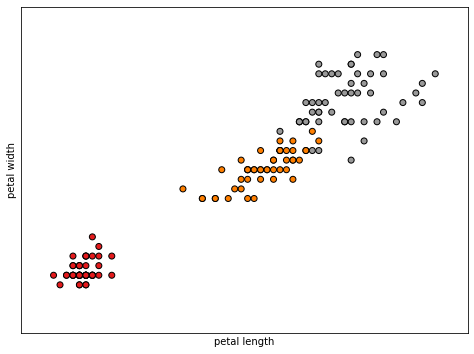

In [3]:
x_min, x_max = z[:, 0].min() - .5, z[:, 0].max() + .5
y_min, y_max = z[:, 1].min() - .5, z[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(z[:, 0], z[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Model for sepal

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
a_train, a_test, b_train, b_test = train_test_split(X,y, test_size=0.2)

In [7]:
lr.fit(a_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
predict=lr.predict(a_test)
predict

array([1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(b_test, predict)
cm

array([[12,  1,  0],
       [ 0,  5,  4],
       [ 0,  4,  4]])

Text(69.0, 0.5, 'Truth')

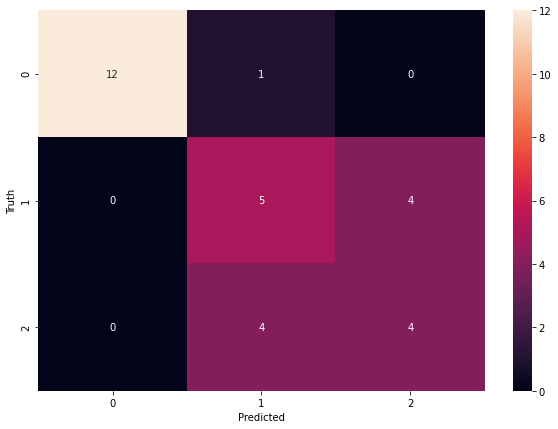

In [10]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
lr.score(a_test,b_test)

0.7

Model for petal

In [12]:
a1_train, a1_test, b1_train, b1_test = train_test_split(z,y, test_size=0.2)

In [13]:
lr.fit(a1_train,b1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predict1=lr.predict(a1_test)
predict1

array([2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2,
       1, 2, 0, 2, 1, 0, 2, 0])

In [15]:
cm1 = confusion_matrix(b1_test, predict1)
cm1

array([[9, 0, 0],
       [0, 9, 1],
       [0, 2, 9]])

Text(69.0, 0.5, 'Truth')

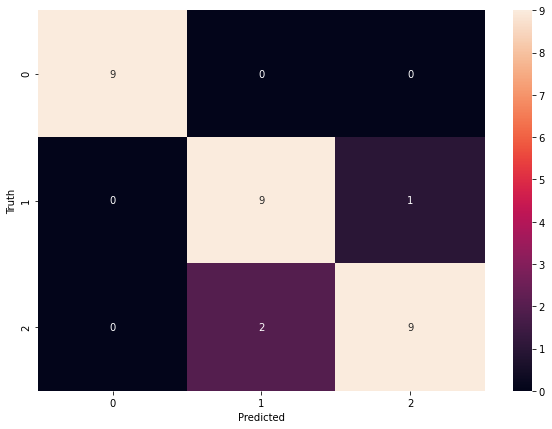

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
 lr.score(a1_test,b1_test)

0.9

In [18]:
from sklearn.svm import SVC

In [19]:
svc=SVC()

In [20]:
svc.fit(a1_train,b1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
svz=svc.predict(a1_test)
cz=confusion_matrix(svz,b1_test)
cz

array([[9, 0, 0],
       [0, 9, 3],
       [0, 1, 8]])

Text(69.0, 0.5, 'Truth')

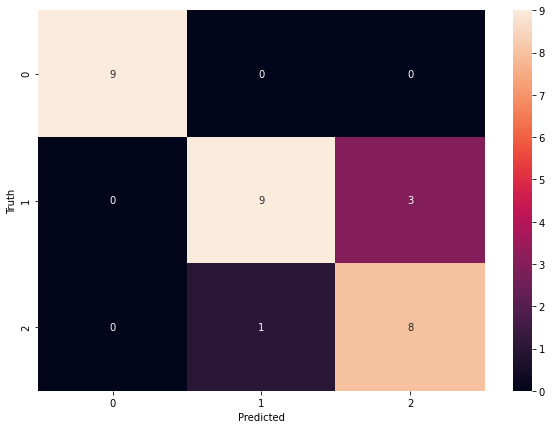

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cz, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
svc.score(a1_test,b1_test)

0.8666666666666667

Using sepals have a better score than petals

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:

cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)

array([0.76, 0.72, 0.8 ])

In [28]:
cross_val_score(SVC(gamma='auto'), X, y,cv=3)

array([0.78, 0.84, 0.78])

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
cross_val_score(RandomForestClassifier(n_estimators=30), X, y,cv=8)

array([0.63157895, 0.78947368, 0.57894737, 0.57894737, 0.73684211,
       0.68421053, 0.61111111, 0.83333333])